In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import roc_curve , auc , accuracy_score, precision_score, recall_score, f1_score ,confusion_matrix



import matplotlib.pyplot as plt
import mglearn
import numpy as np 
import pandas as pd 

In [25]:
%matplotlib inline 

In [9]:
df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
X = df.drop(['ID','ZIPCode','PersonalLoan'],axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [11]:
y = df['PersonalLoan']
np.bincount(y)

array([4520,  480], dtype=int64)

In [12]:
X['Education']=X['Education'].replace([1,2,3],['Under','Grad','Prof'])
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,Under,0,1,0,0,0
1,45,19,34,3,1.5,Under,0,1,0,0,0
2,39,15,11,1,1.0,Under,0,0,0,0,0
3,35,9,100,1,2.7,Grad,0,0,0,0,0
4,35,8,45,4,1.0,Grad,0,0,0,0,1


In [13]:
X = pd.get_dummies(X[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']],
                  columns=['Education'],
                  drop_first=True)

X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Education_Prof,Education_Under
0,25,1,49,4,1.6,0,1,0,0,0,0,1
1,45,19,34,3,1.5,0,1,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,1,0,0


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state = 999 ,stratify =y)

In [17]:
#모델

tree = DecisionTreeClassifier(max_depth=1,criterion='entropy',random_state=999)

adaboost = AdaBoostClassifier(base_estimator=tree , n_estimators=500,
                             learning_rate = 0.1, random_state= 999)

modelList_label = ['DecisionTree','AdaBoost']
modelList = [tree,adaboost]

In [19]:
tree.fit(X_train,y_train)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=999,
            splitter='best'),
          learning_rate=0.1, n_estimators=500, random_state=999)

In [21]:
#모델 검정 
for m , label in zip(modelList, modelList_label):
    scores = cross_val_score(estimator=m , X = X_train,y=y_train, cv=10,scoring='roc_auc')
    print('ROC AUC : %0.3f (+/- %0.3f) [%s]'%(scores.mean(), scores.std(), label))

ROC AUC : 0.875 (+/- 0.026) [DecisionTree]
ROC AUC : 0.981 (+/- 0.007) [AdaBoost]


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=999,
            splitter='best') DecisionTree red -
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=999,
            splitter='best'),
          learning_rate=0.1, n_estimators=500, random_state=999) AdaBoost green -


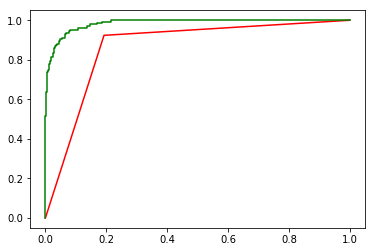

In [34]:
# ROC 곡선 

colors = ['red','green','blue','orange']

for m , label , c , ls in zip(modelList , modelList_label, colors , '--'):
    m.fit(X_train,y_train)
    y_pred =m.predict_log_proba(X_test)[:,1]
    fpr, tpr ,threshols = roc_curve( y_true=y_test,y_score=y_pred)
    print(m , label , c, ls )
    roc_auc = auc(x=fpr,y=tpr)
    plt.plot(fpr, tpr, color = c , linestyle = ls , 
             label = '%s (auc= %0.3f)'%(label,roc_auc))


    
    
    
    

In [35]:
y_pred = adaboost.predict(X_test)

In [38]:
conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),index=['True[0]','True[1]'],
                     columns = ['Predict[0]','Predict[1]'])
conMat

,Predict[0],Predict[1]
True[0],1339,17
True[1],33,111


In [39]:
print('잘못분류된 샘플 : %d'%(y_test != y_pred).sum())
print('정확도 : ', accuracy_score(y_test,y_pred))
print('정밀도 : ', precision_score(y_test,y_pred))
print('재현율 : ', recall_score(y_test,y_pred))
print('f1 score : ', f1_score(y_test,y_pred))


잘못분류된 샘플 : 50
정확도 :  0.9666666666666667
정밀도 :  0.8671875
재현율 :  0.7708333333333334
f1 score :  0.8161764705882352
